<a href="https://colab.research.google.com/github/emmab2022/Phddataset/blob/main/Final_Results_DTree_and_Rforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluating Decision Tree and Random Forest Models**

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## **Loading and Splitting the Data**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/emmab2022/Phddataset/main/v16Final%20PHD%20Data%20Set.csv')
data

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA,GRADUATED
0,2,2,2,1,5,1,1,3,1
1,2,1,2,1,5,1,1,3,1
2,2,2,2,1,2,1,1,3,1
3,2,2,2,1,5,1,1,3,1
4,2,2,2,1,2,1,1,3,1
...,...,...,...,...,...,...,...,...,...
9994,2,1,1,4,5,2,1,4,2
9995,2,1,1,4,2,2,1,4,2
9996,2,1,2,4,2,1,2,3,2
9997,2,2,2,4,1,1,2,3,2


## **Split the Data**

In [ ]:
X = data.drop('GRADUATED', axis=1)
X

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA
0,2,2,2,1,5,1,1,3
1,2,1,2,1,5,1,1,3
2,2,2,2,1,2,1,1,3
3,2,2,2,1,5,1,1,3
4,2,2,2,1,2,1,1,3
...,...,...,...,...,...,...,...,...
9994,2,1,1,4,5,2,1,4
9995,2,1,1,4,2,2,1,4
9996,2,1,2,4,2,1,2,3
9997,2,2,2,4,1,1,2,3


In [ ]:
y = data['GRADUATED']
y

0       1
1       1
2       1
3       1
4       1
       ..
9994    2
9995    2
9996    2
9997    2
9998    2
Name: GRADUATED, Length: 9999, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA
9253,2,2,1,2,5,2,1,1
1561,2,2,2,2,5,1,2,4
1670,2,2,1,2,1,1,2,4
6086,2,1,1,4,2,2,1,4
7332,2,1,2,1,5,1,1,2
...,...,...,...,...,...,...,...,...
5734,2,2,1,4,2,2,1,1
5191,2,1,2,4,2,1,2,2
5390,2,2,1,4,2,2,1,3
860,2,2,1,1,5,1,1,1


In [ ]:
X_test

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA
5344,2,2,1,4,2,2,1,4
7444,2,1,1,1,1,2,1,2
1731,2,1,2,2,2,1,2,4
8719,2,1,1,2,2,1,2,3
4521,2,2,1,3,2,2,1,4
...,...,...,...,...,...,...,...,...
9448,2,1,1,2,2,2,1,1
8284,2,2,1,1,2,2,1,1
7852,2,1,2,1,5,1,1,1
1095,2,2,1,1,5,1,1,1


## **Building and Evaluating Decision Tree Models**
---



**Decision Tree - Iteration 1**

In [ ]:
dtree1 = DecisionTreeClassifier(random_state=42)

In [ ]:
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt1 = dtree1.predict(X_test)
accuracy_dt1 = accuracy_score(y_test, y_pred_dt1)
print("DTree Iteration 1 Accuracy:", accuracy_dt1)

DTree Iteration 1 Accuracy: 0.8175


**Decision Tree - Interation 2 Adjusting 'max_depth' and 'min_samples_split**

* Step 1: Fine-Tuning Hyperparameters: Modify 'min_samples_split' and 'max_depth' limits the depth of the tree to prevent overfitting, and 'min_samples_split' specifies the minimum number of samples required to split an internal node.
* Step 2: Retraining the Model: Fit the model with training data.
* Step 3: Evaluating the Model: Evaluate the model's performance using accuracy.

In [ ]:
dtree2 = DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=42)

In [ ]:
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=42)

In [ ]:
y_pred_dt2 = dtree2.predict(X_test)
accuracy_dt2 = accuracy_score(y_test, y_pred_dt2)
print("DTree Iteration 2 Accuracy:", accuracy_dt2)

DTree Iteration 2 Accuracy: 0.8315


**Decision Tree - Iteration 3 Adjust 'min_samples_leaf'**
* Step 1: Fine-Tuning Hyperparameters: Modify 'min_samples_leaf', which specifies the minimum number of samples required to be at a leaf node.
* Step 2: Retraining the Model: Fit the model with training data.
* Step 3: Evaluating the Model: Evaluate the model's performance.

In [ ]:
dtree3 = DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_samples_leaf=20, random_state=42)

In [ ]:
dtree3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [ ]:
y_pred_dtree3 = dtree3.predict(X_test)
accuracy_dt3 = accuracy_score(y_test, y_pred_dt3)
print("DTree Iteration 3 Accuracy:", accuracy_dt3)

DTree Iteration 3 Accuracy: 0.8315


**Decision Tree - Iteration 4 Adjusting 'criterion'**

* Step 1: Change the 'criterion' to 'entropy', which is a measure of the quality of the split.
* Step 2: Retraining the Model: Fit the model with training data.
* Step 3: Evaluating the Model: Evaluate the model's performance.

In [ ]:
dtree4 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, criterion='entropy', random_state=42)

In [ ]:
dtree4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       random_state=42)

In [ ]:
y_pred_dt4 = dtree4.predict(X_test)
accuracy_dt4 = accuracy_score(y_test, y_pred_dt4)
print("DTree Iteration 4 Accuracy:", accuracy_dt4)

DTree Iteration 4 Accuracy: 0.8205


## **Building and Evaluating Random Forest Models**
---

**Random Forest - Iteration 1**

In [ ]:
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
accuracy_rf1 = accuracy_score(y_test, y_pred_rf1)
print("RF Iteration 1 Accuracy:", accuracy_rf1)

RF Iteration 1 Accuracy: 0.8185


**Random Forest - Iteration 2: Adjusting 'n_estimators' and 'max_depth'**

* Step 1: Fine-Tuning Hyperparameters: Modify 'n_estimators' and 'max_depth' limits the depth of the forest.
* Step 2: Retraining the Model: Fit the model with training data.
* Step 3: Evaluating the Model: Evaluate the model's performance using accuracy.

In [ ]:
rf2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

In [ ]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
y_pred_rf2 = rf2.predict(X_test)
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
print("RF Iteration 2 Accuracy:", accuracy_rf2)

RF Iteration 2 Accuracy: 0.8185


**Random Forest - Iteration 3: Adjusting 'n_estimators, max_depth' and 'min_samples_split**

* Step 1: Fine-Tuning Hyperparameters: Modify 'n_estimators', min_samples_split' and 'max_depth' limits the depth of the forest.
* Step 2: Retraining the Model: Fit the model with training data.
* Step 3: Evaluating the Model: Evaluate the model's performance using accuracy.

In [ ]:
rf3 = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=10, random_state=42)

In [ ]:
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=300,
                       random_state=42)

In [ ]:
y_pred_rf3 = rf3.predict(X_test)
accuracy_rf3 = accuracy_score(y_test, y_pred_rf3)
print("RF Iteration 3 Accuracy:", accuracy_rf3)

RF Iteration 3 Accuracy: 0.8185


**Random Forest - Iteration 4: Adjusting more 'n_estimators, max_depth' and 'min_samples_split**

* Step 1: Fine-Tuning Hyperparameters: Modify 'n_estimators', min_samples_split' and 'max_depth' limits the depth of the forest.
* Step 2: Retraining the Model: Fit the model with training data.
* Step 3: Evaluating the Model: Evaluate the model's performance using accuracy.

In [ ]:
rf4 = RandomForestClassifier(n_estimators=400, max_depth=20, min_samples_split=15, random_state=42)

In [ ]:
rf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=400,
                       random_state=42)

In [ ]:
y_pred_rf4 = rf4.predict(X_test)
accuracy_rf4 = accuracy_score(y_test, y_pred_rf4)
print("RF Iteration 4 Accuracy:", accuracy_rf4)

RF Iteration 4 Accuracy: 0.8185


## **Visualizing the Models**

**Visualizing Decision Tree 1**

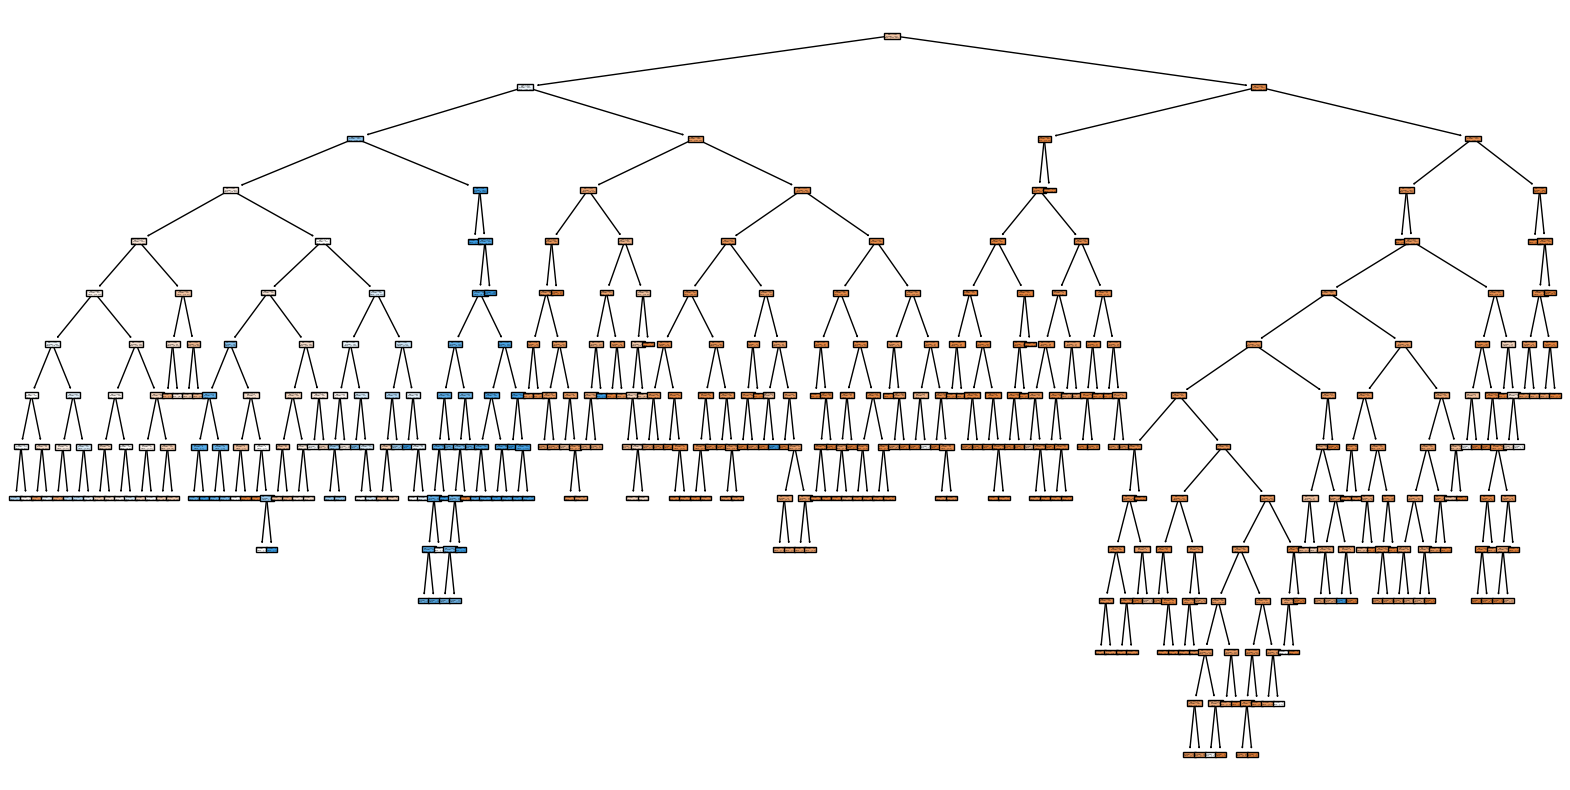

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dtree1, filled=True, feature_names=X.columns)
plt.show()

**Visualizing Decision Tree 2**

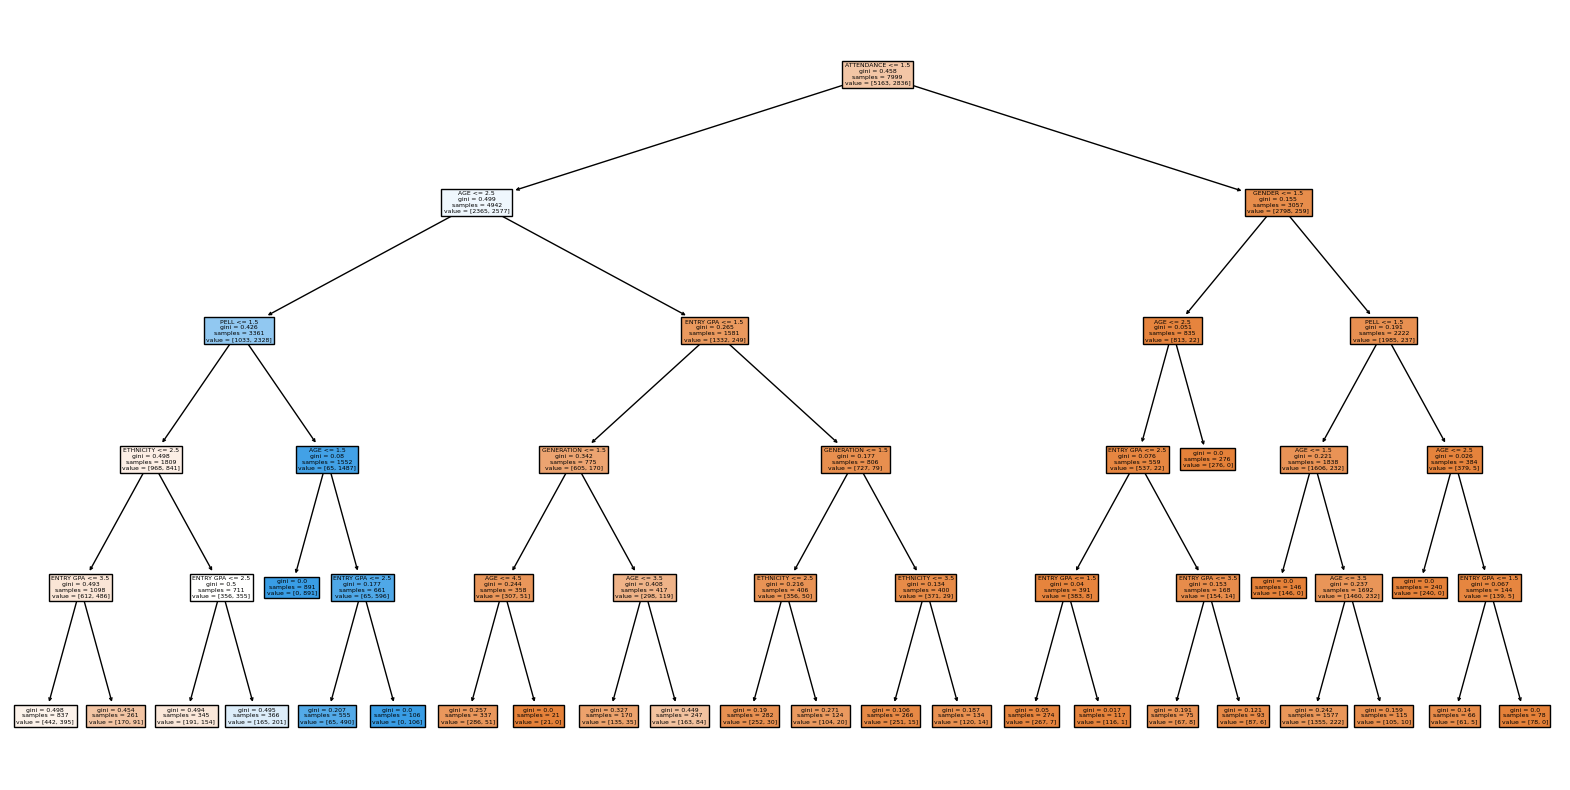

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dtree2, filled=True, feature_names=X.columns)
plt.show()

**Visualizing Decision Tree 3**

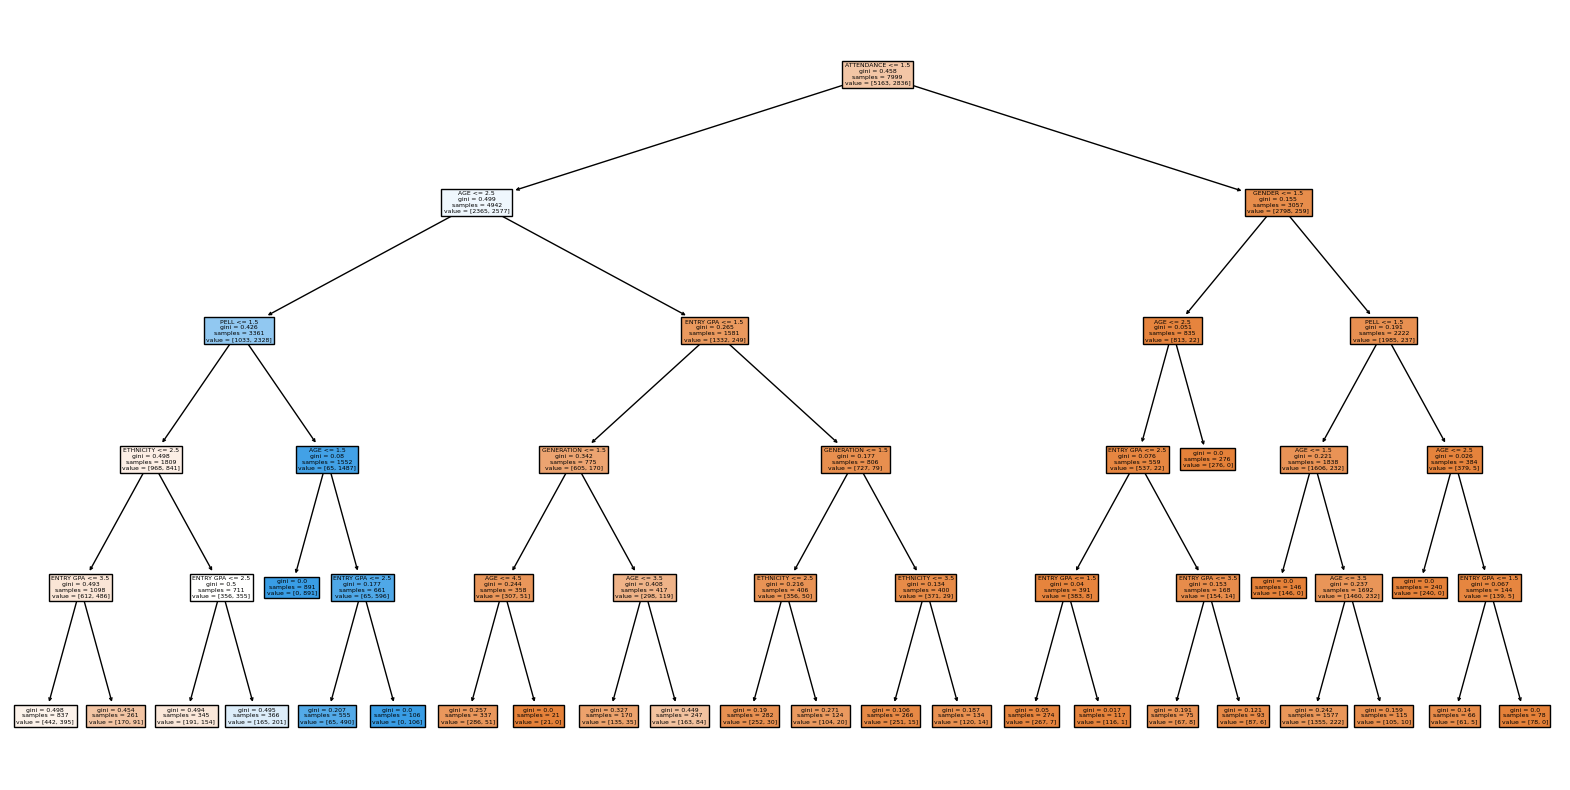

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dtree3, filled=True, feature_names=X.columns)
plt.show()

**Visualizing Decision Tree 4**

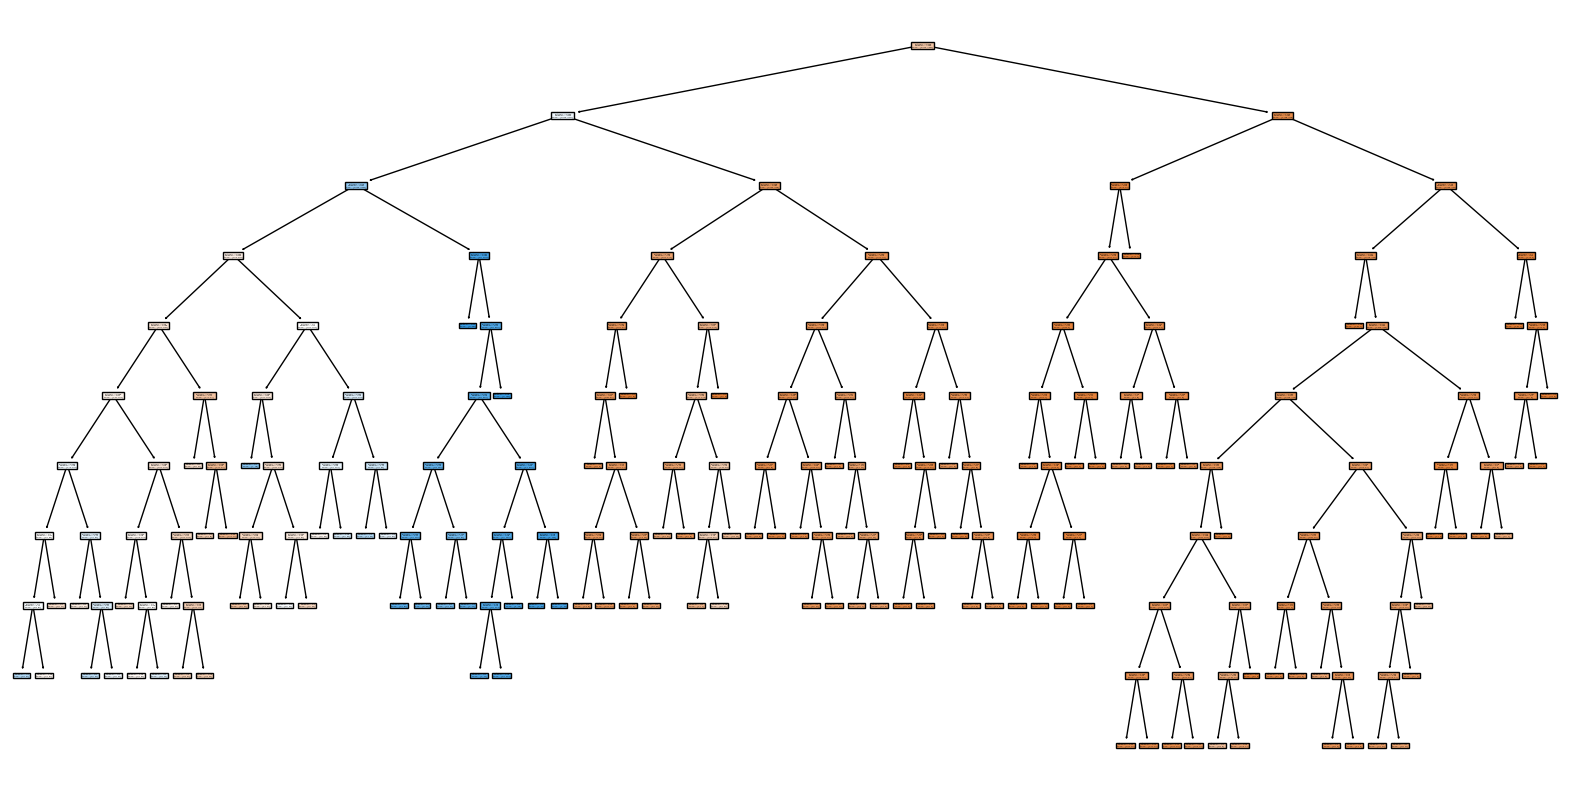

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dtree4, filled=True, feature_names=X.columns)
plt.show()

**Feature Importance for Random Forest 1**

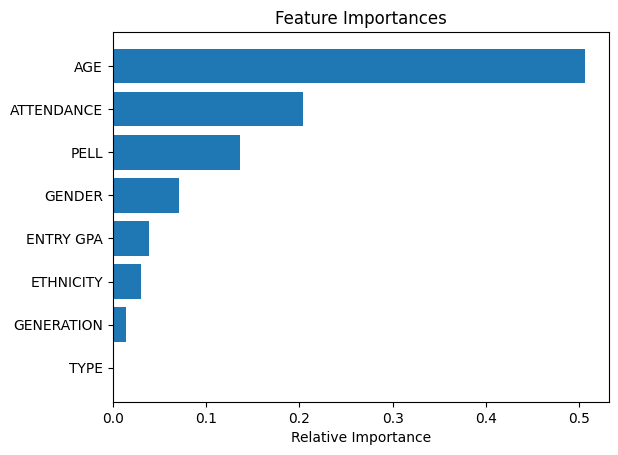

In [ ]:
importances = rf1.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Feature Importance for Random Forest 2**

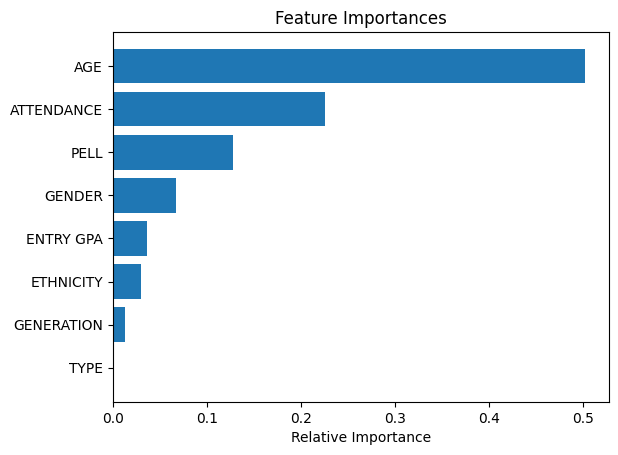

In [ ]:
importances = rf2.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Feature Importance for Random Forest 3**

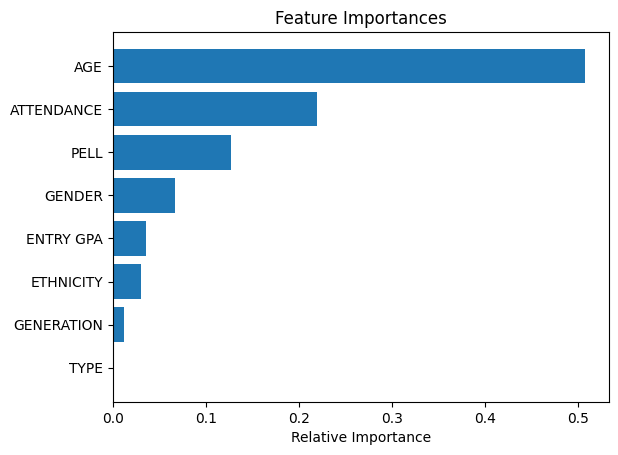

In [ ]:
importances = rf3.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Feature Importance for Random Forest 4**

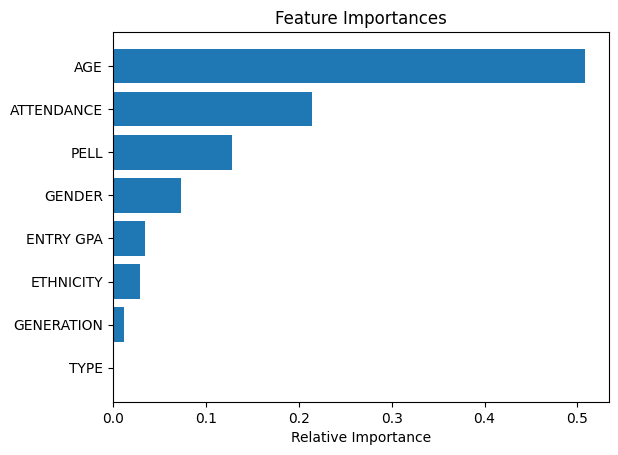

In [ ]:
importances = rf4.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Fine-Tuning and Cross-Validation**
Perform cross-validation for each model and calculate the average accuracy.

**DTree 1 Validation Score**

In [ ]:
scores_dt1 = cross_val_score(dtree1, X, y, cv=5)
avg_score_dt1 = np.mean(scores_dt1)
print("DTree 1 Validation Score", scores_dt1)

DTree 1 Validation Score [0.472      0.5045     0.546      0.4995     0.80490245]


**DTree 2 Validation Score**

In [ ]:
scores_dt2 = cross_val_score(dtree2, X, y, cv=5)
avg_score_dt2 = np.mean(scores_dt2)
print("DTree 2 Validation Score", scores_dt2)

DTree 2 Validation Score [0.46       0.7115     0.43       0.594      0.80490245]


**DTree 3 Validation Score**

In [ ]:
scores_dt3 = cross_val_score(dtree3, X, y, cv=5)
avg_score_dt3 = np.mean(scores_dt3)
print("DTree 3 Validation Score", scores_dt3)

DTree 3 Validation Score [0.371      0.7115     0.43       0.6625     0.80490245]


**DTree 4 Validation Score**

In [ ]:
scores_dt4 = cross_val_score(dtree4, X, y, cv=5)
avg_score_dt4 = np.mean(scores_dt4)
print("DTree 4 Validation Score", scores_dt4)

DTree 4 Validation Score [0.371      0.5875     0.4375     0.61       0.80490245]


**RF 1 Validation Score**

In [ ]:
scores_rf1 = cross_val_score(rf1, X, y, cv=5)
avg_score_rf1 = np.mean(scores_rf1)
print("RF 1 Validation Score", scores_rf1)

RF 1 Validation Score [0.454      0.5515     0.538      0.534      0.80490245]


**RF 2 Validation Score**

In [ ]:
scores_rf2 = cross_val_score(rf2, X, y, cv=5)
avg_score_rf2 = np.mean(scores_rf2)
print("RF 2 Validation Score", scores_rf2)

RF 2 Validation Score [0.4685     0.5495     0.5505     0.5435     0.80490245]


**RF 3 Validation Score**

In [ ]:
scores_rf3 = cross_val_score(rf3, X, y, cv=5)
avg_score_rf3 = np.mean(scores_rf3)
print("RF 3 Validation Score", scores_rf3)

RF 3 Validation Score [0.465      0.5535     0.49       0.5375     0.80490245]


**RF 4 Validation Score**

In [ ]:
scores_rf4 = cross_val_score(rf4, X, y, cv=5)
avg_score_rf4 = np.mean(scores_rf4)
print("RF 4 Validation Score", scores_rf4)

RF 4 Validation Score [0.465      0.5545     0.49       0.5535     0.80490245]


## **Comparing and Visualizing the Results**

**Compare Performance Metrics**

In [ ]:
results = pd.DataFrame({
    'Model': ['DT1', 'DT2', 'DT3', 'DT4', 'RF1', 'RF2', 'RF3', 'RF4'],
    'Accuracy': [accuracy_dt1, accuracy_dt2, accuracy_dt3, accuracy_dt4, accuracy_rf1, accuracy_rf2, accuracy_rf3, accuracy_rf4],
    'Avg CV Score': [avg_score_dt1, avg_score_dt2, avg_score_dt3, avg_score_dt4, avg_score_rf1, avg_score_rf2, avg_score_rf3, avg_score_rf4]
})
print(results)

  Model  Accuracy  Avg CV Score
0   DT1    0.8175       0.56538
1   DT2    0.8315       0.60008
2   DT3    0.8315       0.59598
3   DT4    0.8205       0.56218
4   RF1    0.8185       0.57648
5   RF2    0.8185       0.58338
6   RF3    0.8185       0.57018
7   RF4    0.8185       0.57358


**Visualize the Comparison**

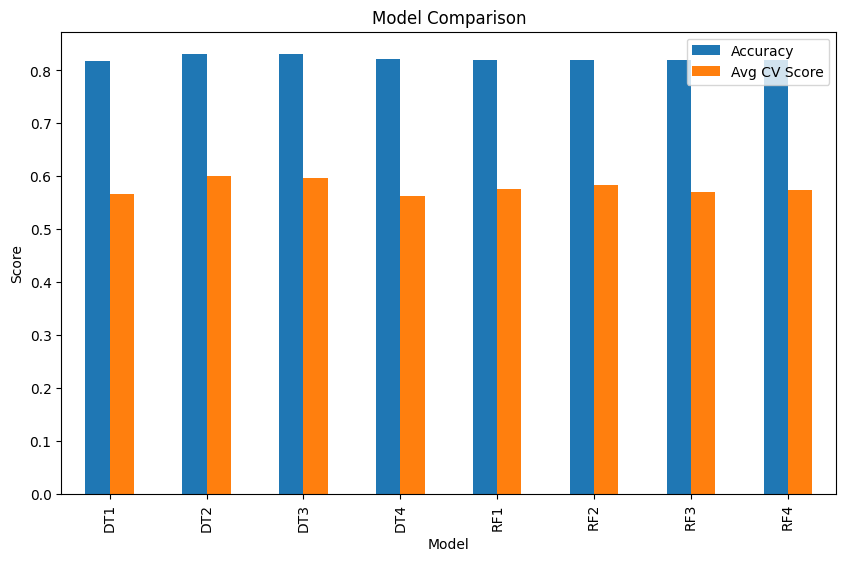

In [ ]:
results.plot(x='Model', y=['Accuracy', 'Avg CV Score'], kind='bar', figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()